In [ ]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

Polynomial pruning percentage:  [0.0, 0.06151042426009612, 0.11978422510570041, 0.1749088788453128, 0.22697186178743256, 0.2760606502405598, 0.3222627205131945, 0.3656655489138359, 0.4063566117509841, 0.4444233853331389, 0.47995334596880007, 0.5130339699664674, 0.5437527336346406, 0.5721971132818195, 0.598454585216504, 0.6226126257471936, 0.6447587111823881, 0.6649803178305876, 0.6833649220002915, 0.7000000000000001, 0.7149730281382126, 0.7283714827234291, 0.7402828400641494, 0.750794576468873, 0.7599941682461, 0.7679690917043301, 0.7748068231520631, 0.7805948388977986, 0.7854206152500365, 0.7893716285172766, 0.7925353550080187, 0.7949992710307625, 0.7968508528940079, 0.7981775769062546, 0.7990669193760024, 0.7996063566117511, 0.7998833649220003, 0.7999854206152501, 0.8]
Polynomial pruning percentage len:  39
Gamma parameters:  [0.0, 0.06151042426009612, 0.062093178605272525, 0.06262629608772008, 0.0630996766384534, 0.0635019425898683, 0.06382036048736306, 0.06404078647334666, 0.064147

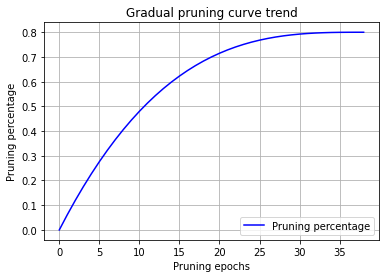

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

initial_pruning = 0.0
final_pruning = 0.8
begin_step = 1000
end_step = 20000
frequency = 500

current_pruning_percentage = 0  
pruning_iterations = (end_step - begin_step) / frequency
polynomial_pruning_percentage = []
for step in range(begin_step, end_step +1 , frequency): 
  current_pruning_percentage = final_pruning + (initial_pruning - final_pruning) * pow(1 - ((step - begin_step) / (end_step - begin_step)), 3)
  polynomial_pruning_percentage.append(current_pruning_percentage)

print("Polynomial pruning percentage: ", polynomial_pruning_percentage)
print("Polynomial pruning percentage len: ", len(polynomial_pruning_percentage))

# obtain the gamma parameters to pass in the Pytorch pruning method 
gamma_parameters = []

first = False 

for pruning_percentage in polynomial_pruning_percentage: 
  if first==True: 
    denominator = 1  
    for gamma in gamma_parameters:
      denominator *= (1 - gamma)
    gamma_parameters.append(1 - ((1 - pruning_percentage) / denominator))  
  else: 
    gamma_parameters.append(pruning_percentage)
    if pruning_percentage != 0.0: 
      first = True
print("Gamma parameters: ",gamma_parameters)  
print("Gamma parameters len: ", len(gamma_parameters))

iterations = np.arange(0, len(polynomial_pruning_percentage), 1)

plt.clf()
plt.plot(iterations, polynomial_pruning_percentage, 'b-')
plt.grid(True)
plt.legend(["Pruning percentage", "Loss validation"], loc="lower right")
plt.title("Gradual pruning curve trend")
plt.xlabel('Pruning epochs')
plt.ylabel('Pruning percentage')
plt.figure()
plt.show()


In [ ]:
initial_pruning = 0.0
final_pruning = 0.8
begin_step = 20
end_step = 100
frequency = 1

current_pruning_percentage = 0  
pruning_iterations = (end_step - begin_step) / frequency
polynomial_pruning_percentage = []
for step in range(begin_step, end_step +1 , frequency): 
  current_pruning_percentage = final_pruning + (initial_pruning - final_pruning) * pow(1 - ((step - begin_step) / (end_step - begin_step)), 3)
  polynomial_pruning_percentage.append(current_pruning_percentage)

print(polynomial_pruning_percentage)

[0.0, 0.029626562499999953, 0.05851250000000008, 0.08666718750000002, 0.11410000000000009, 0.14082031250000004, 0.16683749999999997, 0.19216093749999996, 0.2168, 0.24076406250000015, 0.2640625, 0.2867046874999999, 0.3087000000000001, 0.3300578125, 0.35078750000000003, 0.3708984375, 0.3903999999999999, 0.40930156250000005, 0.42761249999999995, 0.4453421875000001, 0.4625, 0.4790953124999999, 0.4951375, 0.5106359375, 0.5256000000000001, 0.5400390625, 0.5539625, 0.5673796875000001, 0.5803, 0.5927328125000001, 0.6046875, 0.6161734375, 0.6272000000000001, 0.6377765625, 0.6479125000000001, 0.6576171875000001, 0.6669, 0.6757703125000001, 0.6842375, 0.6923109375000001, 0.7000000000000001, 0.7073140625000001, 0.7142625, 0.7208546875, 0.7271000000000001, 0.7330078125, 0.7385875000000001, 0.7438484375000001, 0.7488, 0.7534515625, 0.7578125, 0.7618921875, 0.7657, 0.7692453125000001, 0.7725375000000001, 0.7755859375, 0.7784, 0.7809890625, 0.7833625000000001, 0.7855296875000001, 0.7875000000000001, 0

In [ ]:

# obtain the gamma parameters to pass in the Pytorch pruning method 
gamma_parameters = []

first = False 

for pruning_percentage in polynomial_pruning_percentage: 
  if first==True: 
    denominator = 1  
    for gamma in gamma_parameters:
      denominator *= (1 - gamma)
    gamma_parameters.append(1 - ((1 - pruning_percentage) / denominator))  
  else: 
    gamma_parameters.append(pruning_percentage)
    if pruning_percentage != 0.0: 
      first = True
print(gamma_parameters)  

[0.0, 0.029626562499999953, 0.029767856769059686, 0.029904472974946472, 0.030035943223051587, 0.030161770515859554, 0.03028142759718111, 0.030394355842947807, 0.030499964217811093, 0.030597628319714243, 0.03068668953779574, 0.03076645435244152, 0.030836193809979928, 0.030895143208447773, 0.03094250203492377, 0.030977434199125797, 0.030999068612232117, 0.031006500164042272, 0.030998791155596894, 0.030974973248018456, 0.030934049991407808, 0.030874999999999875, 0.030796780841024884, 0.030698333704721636, 0.03057858892120846, 0.030436472386171864, 0.030270912951167794, 0.03008085082532319, 0.02986524702304616, 0.029623093876578688, 0.029353426612596767, 0.02905533596837928, 0.028727981795163338, 0.02837060756437748, 0.027982555656686614, 0.027563283274754102, 0.027112378779235446, 0.02662957820474343, 0.026114781670015907, 0.02556806935592415, 0.024989716688418206, 0.02438020833333332, 0.02374025058856799, 0.023070781748982916, 0.022372980022725808, 0.02164826859655533, 0.0208983174835407

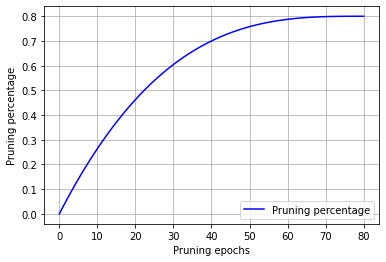

<Figure size 432x288 with 0 Axes>

In [ ]:
iterations = np.arange(0, len(polynomial_pruning_percentage), 1)

plt.clf()
plt.plot(iterations, polynomial_pruning_percentage, 'b-')
plt.grid(True)
plt.legend(["Pruning percentage", "Loss validation"], loc="lower right")
plt.xlabel('Pruning epochs')
plt.ylabel('Pruning percentage')
plt.figure()
plt.show()

In [ ]:
final_pruning_percentage = 1.0

for gamma in gamma_parameters:
  final_pruning_percentage *= float(1.0 - gamma)

print(1 - final_pruning_percentage)  

0.8


In [ ]:
 p = tf.math.minimum(
          1.0,
          tf.math.maximum(
              0.0,
              divide(
                  tf.dtypes.cast(step - self.begin_step, tf.float32),
                  self.end_step - self.begin_step)))
sparsity = tf.math.add(
          tf.math.multiply(self.initial_sparsity - self.final_sparsity,
                           tf.math.pow(1 - p, self.power)),
          self.final_sparsity,
          name='sparsity')

In [ ]:
!pip install tensorflow-datasets==4.4.0
!pip install tensorflow-estimator
!pip install tensorflow-io-gcs-filesystem
!pip install tensorflow-metadata
!pip install tensorflow-model-optimization==0.7.0  # to add model pruning 
!pip install seaborn
!pip install tensorflow_addons # to add https://www.tensorflow.org/addons/api_docs/python/tfa/optimizers/SGDW 

     |████████████████████████████████| 4.0 MB 5.4 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1
     |████████████████████████████████| 213 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 5.4 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
import os
import numpy as np
import tempfile

# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

from absl import flags

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow_model_optimization.python.core.sparsity.keras import prune
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_callbacks
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_schedule

# %load_ext tensorboard

In [ ]:
# set seed to make experiment repeatable 

#SEED = 83
#tf.random.set_seed(SEED)

In [ ]:
# setup GPU computation 

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# Load CIFAR10 dataset.
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train[:90%]', 'train[90%:]', 'test'],
    as_supervised=True,
    data_dir='/content/drive/MyDrive/tesnsorflow_datasets/',
    with_info=True
)

# Normalize the input image so that each pixel value is between 0 and 1.
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.image.convert_image_dtype(image, tf.float32), label

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling cifar10-train.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling cifar10-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /content/drive/MyDrive/tesnsorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


# convert dataset into pandas dataframe to plot labels distribution 

In [ ]:
ds_train_pandas = tfds.as_dataframe(ds_train, ds_info)
ds_val_pandas = tfds.as_dataframe(ds_val, ds_info)
ds_test_pandas = tfds.as_dataframe(ds_test, ds_info)

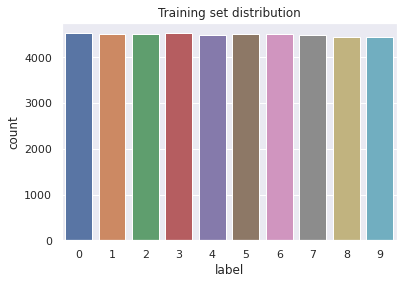

In [ ]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="label", data=ds_train_pandas).set_title('Training set distribution')

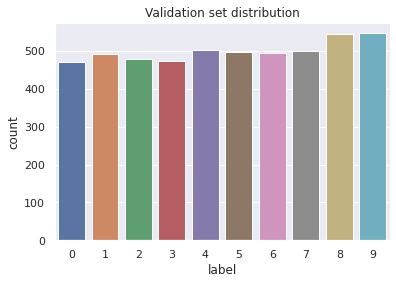

In [ ]:
ax = sns.countplot(x="label", data=ds_val_pandas).set_title('Validation set distribution')

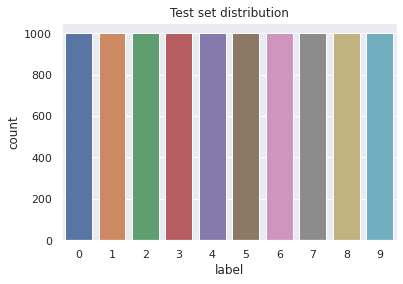

In [ ]:
ax = sns.countplot(x="label", data=ds_test_pandas).set_title('Test set distribution')

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!nvidia-smi

Wed Nov 17 09:55:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    78W / 149W |    147MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Load the data in batches of 128 images.

batch_size = 128

def prepare_dataset(ds, buffer_size=None):
    ds = ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    ds = ds.cache()
    if buffer_size:
        ds = ds.shuffle(buffer_size)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

# Visualize Training set Images

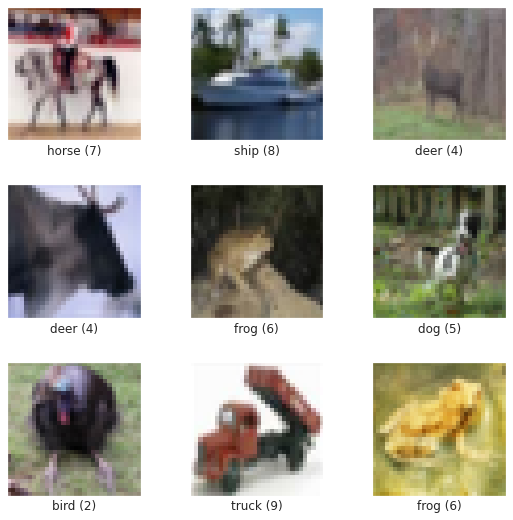

In [ ]:
fig = tfds.show_examples(ds_train, ds_info)

In [ ]:
# preprocess the datasets 

ds_train_preprocessed = prepare_dataset(ds_train,
                           buffer_size=ds_info.splits['train'].num_examples)
ds_val_preprocessed = prepare_dataset(ds_val)
ds_test_preprocessed = prepare_dataset(ds_test)

# Setup pruning schedule and start training 

/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:2223: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


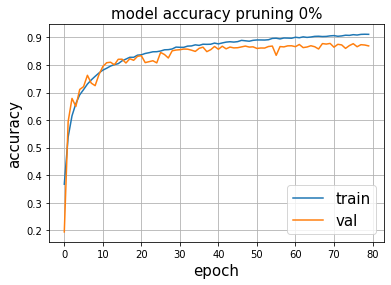

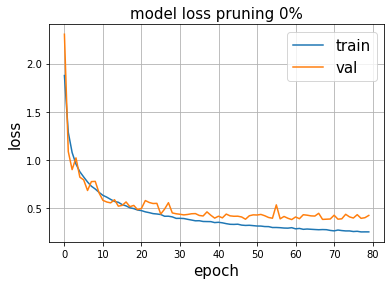

INFO:tensorflow:Assets written to: pruned_CNN_0percentage_epochs80/assets


INFO:tensorflow:Assets written to: pruned_CNN_0percentage_epochs80/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:2223: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


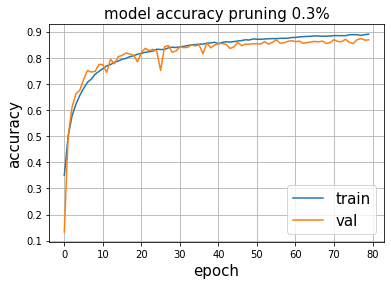

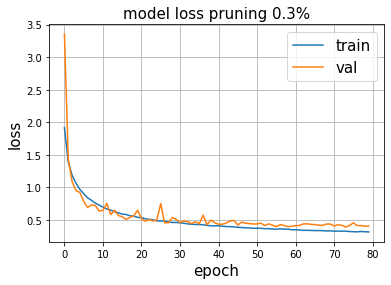

INFO:tensorflow:Assets written to: pruned_CNN_0.3percentage_epochs80/assets


INFO:tensorflow:Assets written to: pruned_CNN_0.3percentage_epochs80/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:2223: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


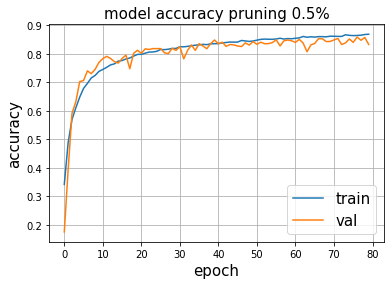

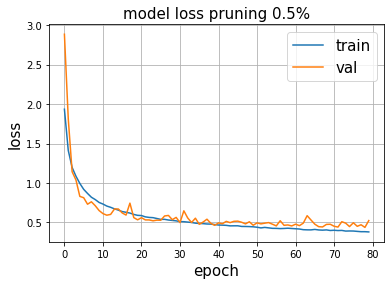

INFO:tensorflow:Assets written to: pruned_CNN_0.5percentage_epochs80/assets


INFO:tensorflow:Assets written to: pruned_CNN_0.5percentage_epochs80/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:2223: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


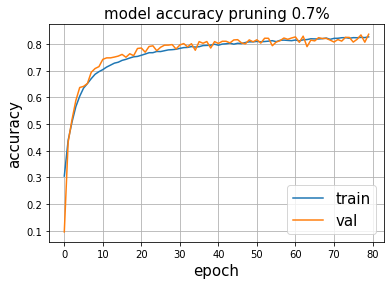

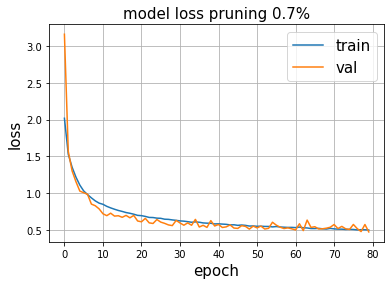

INFO:tensorflow:Assets written to: pruned_CNN_0.7percentage_epochs80/assets


INFO:tensorflow:Assets written to: pruned_CNN_0.7percentage_epochs80/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:2223: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


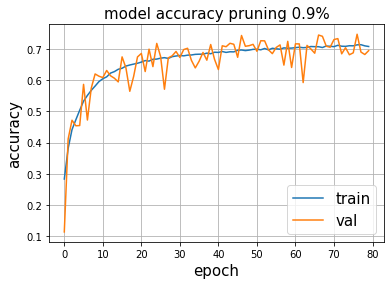

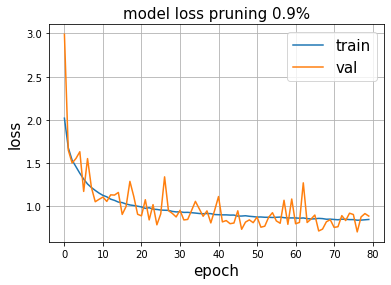

INFO:tensorflow:Assets written to: pruned_CNN_0.9percentage_epochs80/assets


INFO:tensorflow:Assets written to: pruned_CNN_0.9percentage_epochs80/assets


In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 

for pruning_percentage in [0, 0.30, 0.50, 0.70, 0.90]:     

  """ Pruning setup. See [paper](https://arxiv.org/abs/1710.01878) """
  pruning_params = {
      'pruning_schedule':
          pruning_schedule.PolynomialDecay(
              initial_sparsity=0.0,
              final_sparsity=0.3,
              begin_step=35,
              end_step=50,
              frequency=1)              
  }

  """ ResNet50 too powerful for Cifar10 """
  # pruned_model = tf.keras.applications.ResNet50(weights=None,input_shape=[32,32,3], classes=10, pooling='max')

  """ Simpler CNN model with 240.000 params """
  pruned_model = tf.keras.models.Sequential()
  pruned_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
  pruned_model.add(layers.BatchNormalization())
  pruned_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
  pruned_model.add(layers.BatchNormalization())
  pruned_model.add(layers.MaxPooling2D(pool_size=(2,2)))
  pruned_model.add(layers.Dropout(0.3))

  pruned_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  pruned_model.add(layers.BatchNormalization())
  pruned_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  pruned_model.add(layers.BatchNormalization())
  pruned_model.add(layers.MaxPooling2D(pool_size=(2,2)))
  pruned_model.add(layers.Dropout(0.5))

  pruned_model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
  pruned_model.add(layers.BatchNormalization())  
  pruned_model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
  pruned_model.add(layers.BatchNormalization())
  pruned_model.add(layers.MaxPooling2D(pool_size=(2,2)))
  pruned_model.add(layers.Dropout(0.5))

  pruned_model.add(layers.Flatten())
  pruned_model.add(layers.Dense(128, activation='relu'))
  pruned_model.add(layers.BatchNormalization())
  pruned_model.add(layers.Dropout(0.5))
  pruned_model.add(layers.Dense(10))

  """" Modify tf.keras model to be pruned during training. """
  pruned_model = prune.prune_low_magnitude(
      pruned_model, **pruning_params)
  
  # future setup for decaying learning rate 
  lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    0.01,
    decay_steps=25,
    decay_rate=0.96,
    staircase=True)
  
  # adding weight decay to avoid overfitting 
  # op = tfa.optimizers.SGDW(learning_rate=0.0005, weight_decay=0.0005, momentum=0.9)

  #op = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.5, nesterov=True)

  pruned_model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer='adam',
      metrics=['accuracy'])

  epochs = 80

  # logdir = tempfile.mkdtemp()

  # Add a pruning step callback to peg the pruning step to the optimizer's
  # step. Also add a callback to add pruning summaries to tensorboard
  callbacks = [
      pruning_callbacks.UpdatePruningStep()#,
      #pruning_callbacks.PruningSummaries(log_dir=logdir)
  ]

  # start the training procedure 
  history = pruned_model.fit(
      ds_train_preprocessed,
      batch_size=batch_size,
      epochs=epochs,
      verbose=0,
      callbacks=callbacks,
      validation_data=ds_val_preprocessed)
  
  score = pruned_model.evaluate(ds_test_preprocessed, verbose=0)
  # print('Pruned test loss:', score[0])
  # print('Pruned test accuracy:', score[1])

  plt.clf()
  plt.grid(True)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy pruning {}%'.format(pruning_percentage) , fontsize=15)
  plt.ylabel('accuracy', fontsize=15)
  plt.xlabel('epoch', fontsize=15)
  plt.legend(['train', 'val'], loc='lower right', fontsize=15)
  plt.savefig('accuracy', dpi=100, bbox_inches='tight')
  plt.show()

  plt.clf()
  plt.grid(True)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss pruning {}%'.format(pruning_percentage), fontsize=15)
  plt.ylabel('loss', fontsize=15)
  plt.xlabel('epoch', fontsize=15)
  plt.legend(['train', 'val'], loc='upper right',fontsize=15)
  plt.savefig('loss', dpi=100, bbox_inches='tight')
  plt.show()

  pruned_model.save("pruned_CNN_{}percentage_epochs{}".format(pruning_percentage, epochs))

In [ ]:
# store the trained weights 
import cv2
!cp -r pruned_CNN_0percentage_epochs80/ "/content/drive/MyDrive/"
!cp -r pruned_CNN_0.3percentage_epochs80/ "/content/drive/MyDrive/" 
!cp -r pruned_CNN_0.5percentage_epochs80/ "/content/drive/MyDrive/" 
!cp -r pruned_CNN_0.7percentage_epochs80/ "/content/drive/MyDrive/" 
!cp -r pruned_CNN_0.9percentage_epochs80/ "/content/drive/MyDrive/" 

In [ ]:
model_0 = tf.keras.models.load_model('/content/drive/MyDrive/CIFAR10-pruned_cnn/pruned_CNN_0percentage_epochs80')
model_03 = tf.keras.models.load_model('/content/drive/MyDrive/CIFAR10-pruned_cnn/pruned_CNN_0.3percentage_epochs80')
model_05 = tf.keras.models.load_model('/content/drive/MyDrive/CIFAR10-pruned_cnn/pruned_CNN_0.5percentage_epochs80')
model_07 = tf.keras.models.load_model('/content/drive/MyDrive/CIFAR10-pruned_cnn/pruned_CNN_0.7percentage_epochs80')
model_09 = tf.keras.models.load_model('/content/drive/MyDrive/CIFAR10-pruned_cnn/pruned_CNN_0.9percentage_epochs80')

# Number of label mispredicted per classes for each model 

Text(0.5, 1.0, '90% pruning')

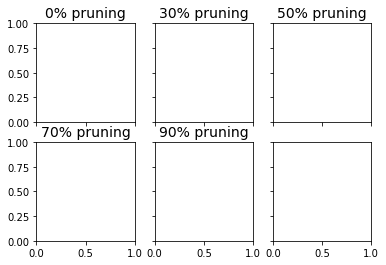

In [ ]:
import matplotlib.pyplot as plt 

models = [model_0, model_03, model_05, model_07, model_09]
pruning_percentage = [0, 0.3, 0.5, 0.7, 0.9]


fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

fontsize = 14
ax[0, 0].set_title('0% pruning', fontsize=fontsize)
ax[0, 1].set_title('30% pruning', fontsize=fontsize)
ax[0, 2].set_title('50% pruning', fontsize=fontsize)
ax[1, 0].set_title('70% pruning', fontsize=fontsize)
ax[1, 1].set_title('90% pruning', fontsize=fontsize)

Test set accuracy: 86.130%


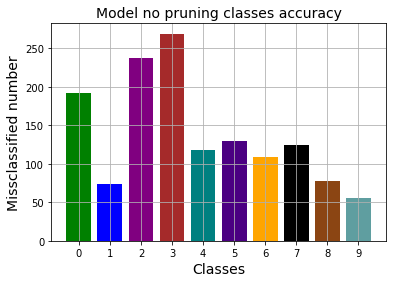

In [ ]:
# hashmap saving for each class the number of example in the test set mispredicted 
misprediction_for_classes = {"0":0, "1":0, "2":0, "3":0, "4":0, "5":0, "6":0 ,"7":0 ,"8":0,"9":0 }
test_accuracy = tf.keras.metrics.Accuracy()


for (x, y) in ds_test_preprocessed:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model_0(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int64)
  iterator = 0 
  #print(prediction)
  #print(y)


  for i in prediction: 
    #print(i)
    #print(y[iterator])
    if i != y[iterator]: 
      misprediction_for_classes[str(int(y[iterator]))] += 1 
    iterator += 1   
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

# plot the result as columns 
labels = []
missclassified_examples = []

for label in misprediction_for_classes: 
  labels.append(label)
  missclassified_examples.append(misprediction_for_classes[label])

plt.clf()
Colors = ['green','blue','purple','brown','teal', 'indigo', 'orange', 'black', 'saddlebrown', 'cadetblue']
plt.bar(labels, missclassified_examples, color=Colors)
plt.title('Model no pruning classes accuracy', fontsize=14)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Missclassified number', fontsize=14)
plt.grid(True)
plt.show()

ax[0,0].plot(labels, missclassified_examples)
# print(misprediction_for_classes)

In [ ]:
for label in misprediction_for_classes: 
  print(misprediction_for_classes[label])

192
74
238
269
118
130
109
124
78
55


Test set accuracy: 86.230%


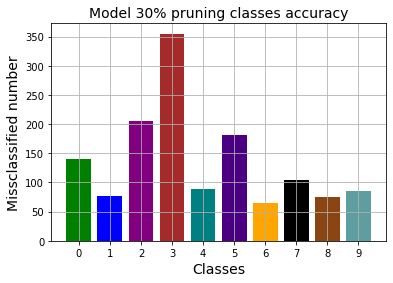

In [ ]:
# hashmap saving for each class the number of example in the test set mispredicted 
misprediction_for_classes = {"0":0, "1":0, "2":0, "3":0, "4":0, "5":0, "6":0 ,"7":0 ,"8":0,"9":0 }
test_accuracy = tf.keras.metrics.Accuracy()


for (x, y) in ds_test_preprocessed:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model_03(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int64)
  iterator = 0 
  #print(prediction)
  #print(y)


  for i in prediction: 
    #print(i)
    #print(y[iterator])
    if i != y[iterator]: 
      misprediction_for_classes[str(int(y[iterator]))] += 1 
    iterator += 1   
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

# plot the result as columns 
labels = []
missclassified_examples = []

for label in misprediction_for_classes: 
  labels.append(label)
  missclassified_examples.append(misprediction_for_classes[label])

plt.clf()
Colors = ['green','blue','purple','brown','teal', 'indigo', 'orange', 'black', 'saddlebrown', 'cadetblue']
plt.bar(labels, missclassified_examples, color=Colors)
plt.title('Model 30% pruning classes accuracy', fontsize=14)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Missclassified number', fontsize=14)
plt.grid(True)
plt.show()

Test set accuracy: 82.420%


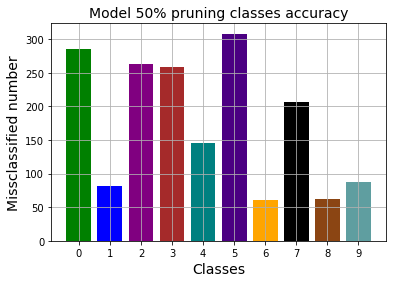

In [ ]:
# hashmap saving for each class the number of example in the test set mispredicted 
misprediction_for_classes = {"0":0, "1":0, "2":0, "3":0, "4":0, "5":0, "6":0 ,"7":0 ,"8":0,"9":0 }
test_accuracy = tf.keras.metrics.Accuracy()


for (x, y) in ds_test_preprocessed:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model_05(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int64)
  iterator = 0 
  #print(prediction)
  #print(y)


  for i in prediction: 
    #print(i)
    #print(y[iterator])
    if i != y[iterator]: 
      misprediction_for_classes[str(int(y[iterator]))] += 1 
    iterator += 1   
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


# plot the result as columns 
labels = []
missclassified_examples = []

for label in misprediction_for_classes: 
  labels.append(label)
  missclassified_examples.append(misprediction_for_classes[label])

plt.clf()
Colors = ['green','blue','purple','brown','teal', 'indigo', 'orange', 'black', 'saddlebrown', 'cadetblue']
plt.bar(labels, missclassified_examples, color=Colors)
plt.title('Model 50% pruning classes accuracy', fontsize=14)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Missclassified number', fontsize=14)
plt.grid(True)
plt.show()

Test set accuracy: 82.860%


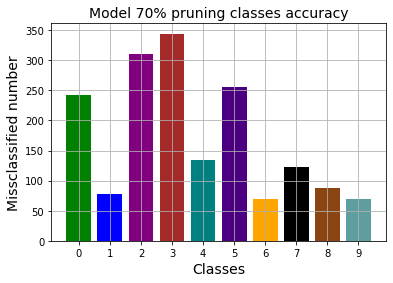

In [ ]:
# hashmap saving for each class the number of example in the test set mispredicted 
misprediction_for_classes = {"0":0, "1":0, "2":0, "3":0, "4":0, "5":0, "6":0 ,"7":0 ,"8":0,"9":0 }
test_accuracy = tf.keras.metrics.Accuracy()


for (x, y) in ds_test_preprocessed:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model_07(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int64)
  iterator = 0 
  #print(prediction)
  #print(y)


  for i in prediction: 
    #print(i)
    #print(y[iterator])
    if i != y[iterator]: 
      misprediction_for_classes[str(int(y[iterator]))] += 1 
    iterator += 1   
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


# plot the result as columns 
labels = []
missclassified_examples = []

for label in misprediction_for_classes: 
  labels.append(label)
  missclassified_examples.append(misprediction_for_classes[label])

plt.clf()
Colors = ['green','blue','purple','brown','teal', 'indigo', 'orange', 'black', 'saddlebrown', 'cadetblue']
plt.bar(labels, missclassified_examples, color=Colors)
plt.title('Model 70% pruning classes accuracy', fontsize=14)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Missclassified number', fontsize=14)
plt.grid(True)
plt.show()

Test set accuracy: 82.860%


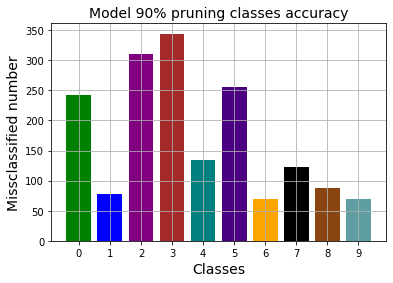

In [ ]:
# hashmap saving for each class the number of example in the test set mispredicted 
misprediction_for_classes = {"0":0, "1":0, "2":0, "3":0, "4":0, "5":0, "6":0 ,"7":0 ,"8":0,"9":0 }
test_accuracy = tf.keras.metrics.Accuracy()


for (x, y) in ds_test_preprocessed:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model_07(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int64)
  iterator = 0 
  #print(prediction)
  #print(y)


  for i in prediction: 
    #print(i)
    #print(y[iterator])
    if i != y[iterator]: 
      misprediction_for_classes[str(int(y[iterator]))] += 1 
    iterator += 1   
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


# plot the result as columns 
labels = []
missclassified_examples = []

for label in misprediction_for_classes: 
  labels.append(label)
  missclassified_examples.append(misprediction_for_classes[label])

plt.clf()
Colors = ['green','blue','purple','brown','teal', 'indigo', 'orange', 'black', 'saddlebrown', 'cadetblue']
plt.bar(labels, missclassified_examples, color=Colors)
plt.title('Model 90% pruning classes accuracy', fontsize=14)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Missclassified number', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
score = model_0.evaluate(ds_test_preprocessed, verbose=0)
print('Model 0 pruned test loss:', score[0])
print('Model 0 pruned test accuracy:', score[1])

score = model_03.evaluate(ds_test_preprocessed, verbose=0)
print('Model 30% pruned test loss:', score[0])
print('Model 30% pruned test accuracy:', score[1])

score = model_05.evaluate(ds_test_preprocessed, verbose=0)
print('Model 50% pruned test loss:', score[0])
print('Model 50% pruned test accuracy:', score[1])

score = model_07.evaluate(ds_test_preprocessed, verbose=0)
print('Model 70% pruned test loss:', score[0])
print('Model 70% pruned test accuracy:', score[1])

score = model_09.evaluate(ds_test_preprocessed, verbose=0)
print('Model 90% pruned test loss:', score[0])
print('Model 90% pruned test accuracy:', score[1])

Model 0 pruned test loss: 0.47524628043174744
Model 0 pruned test accuracy: 0.861299991607666
Model 30% pruned test loss: 0.4221138060092926
Model 30% pruned test accuracy: 0.8622999787330627
Model 50% pruned test loss: 0.5385106205940247
Model 50% pruned test accuracy: 0.8241999745368958
Model 70% pruned test loss: 0.5043210983276367
Model 70% pruned test accuracy: 0.8285999894142151
Model 90% pruned test loss: 0.9166885018348694
Model 90% pruned test accuracy: 0.6847000122070312


In [ ]:
score = pruned_model.evaluate(ds_val_preprocessed, verbose=0)
print('Pruned validation loss:', score[0])
print('Pruned validation accuracy:', score[1])

# Export and import the pruned_model. Check that accuracy persists.
saved_model_dir = '/tmp/saved_model'
print('Saving pruned_model to: ', saved_model_dir)
tf.keras.models.save_model(pruned_model, saved_model_dir, save_format='tf')
print('Loading pruned_model from: ', saved_model_dir)
loaded_model = tf.keras.models.load_model(saved_model_dir)

score = loaded_model.evaluate(ds_test_preprocessed, verbose=0)
print('Pruned test loss:', score[0])
print('Pruned test accuracy:', score[1])


In [ ]:
%tensorboard --logdir={logdir}

In [ ]:
model = get_sequential_model([32, 32, 3])

epochs = 100

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

In [ ]:
model.fit(
    ds_train_preprocessed,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks,
    validation_data=ds_val_preprocessed)

score = model.evaluate(ds_val_preprocessed, verbose=0)
print('NOT Pruned validation loss:', score[0])
print('NOT Pruned validation accuracy:', score[1])

# Export and import the pruned_model. Check that accuracy persists.
saved_model_dir = '/tmp/saved_model'
print('Saving pruned_model to: ', saved_model_dir)
tf.keras.models.save_model(model, saved_model_dir, save_format='tf')
print('Loading  from: ', saved_model_dir)
loaded_model = tf.keras.models.load_model(saved_model_dir)

score = loaded_model.evaluate(ds_test_preprocessed, verbose=0)
print('Pruned test loss:', score[0])
print('Pruned test accuracy:', score[1])